# Low Frequency OOI hydrophone data in zarr file
<img src="https://zarr.dev/android-chrome-512x512.png" width="200"> + <img src="../imgs/ooi_logo.png" width="300">

[Zarr](https://zarr.dev/) is a cloud optimized data format that allows for exploration of large dataset.

8 years of ambient sound data measured by the low-frequency (fs=200 Hz) OOI hydrophones has been converted from the original mseed file format into zarr. This greatly increases the efficiency of exploring the hydrophone data.

In [6]:
import ooi_2025_summer_school_acoustics as oa
import pandas as pd

In [4]:
lf_hydrophones =oa.open_lf_hydrophones()

In [5]:
lf_hydrophones

<xarray.Dataset> Size: 2TB
Dimensions:  (time: 50855040000)
Dimensions without coordinates: time
Data variables:
    AXBA1    (time) float64 407GB dask.array<chunksize=(720000,), meta=np.ndarray>
    AXCC1    (time) float64 407GB dask.array<chunksize=(720000,), meta=np.ndarray>
    AXEC2    (time) float64 407GB dask.array<chunksize=(720000,), meta=np.ndarray>
    HYS14    (time) float64 407GB dask.array<chunksize=(720000,), meta=np.ndarray>
    HYSB1    (time) float64 407GB dask.array<chunksize=(720000,), meta=np.ndarray>
Attributes:
    channel:        HDH
    delta:          0.005
    network:        OO
    sampling_rate:  200
    units:          Pa

In [7]:
ds_slice = oa.slice_lf_hydrophones(lf_hydrophones, pd.Timestamp('2018-01-01'), pd.Timestamp('2018-01-01 T01:00:00'))

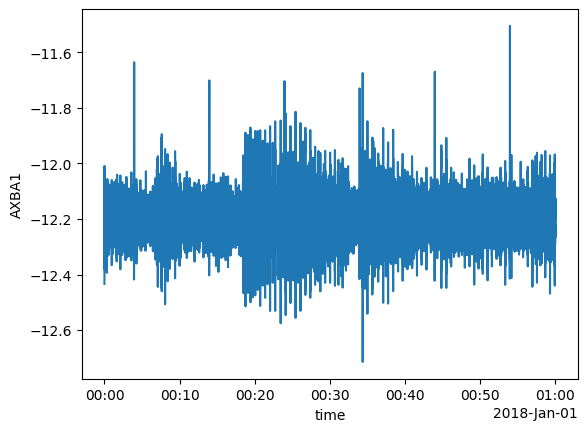

In [9]:
ds_slice['AXBA1'].plot()